In [53]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from numpy import diff

In [54]:
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv'

In [55]:
filename = 'DatosParabolico.csv'

In [56]:
urllib.request.urlretrieve(url, filename)

('DatosParabolico.csv', <http.client.HTTPMessage at 0x1b3b2084550>)

In [57]:
data = np.loadtxt(filename,dtype=str,skiprows=1)
data1 = []
X = []
Y = []
for i in range(len(data)):
    lista = data[i].split(",")
    lista1 = [ float(x) for x in lista ]
    data1.append(lista1)
    
for i in data1:
    X.append(i[0])
    Y.append(i[1])
X,Y

([1.4, 3.5, 5.6], [0.4007954931819738, 0.594128102489774, 0.29802795523938164])

In [39]:
def Lagrange(x,xi,j): 
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

def Interpolate(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

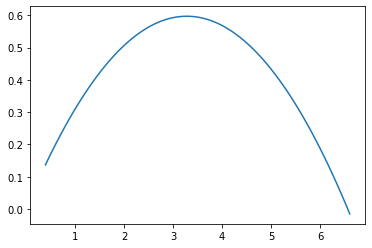

In [40]:
x = np.linspace(X[0]-1,X[-1]+1,100)
y = Interpolate(x,X,Y)
plt.plot(x,y)

In [94]:
x = sym.symbols('x')
f = Interpolate(x,X,Y)
f = sym.simplify(f)
f = sym.expand(f)
f

-0.0554912422401579*x**2 + 0.363970234266202*x

In [95]:
def Velocity(f,a):
    v = sym.diff(f,x)
    return v.evalf(subs={x: a})

In [96]:
Velocity(f,0)

0.363970234266202

In [111]:
theta = sym.atan(f.coeff(x))
#theta*=180/np.pi
theta

0.349065850398866

In [112]:
v = np.sqrt(2*9.8*Y[1])/sym.sin(theta)
v

9.97737736891286